In [1]:
!pip install kaggle

In [19]:
!pip install -U kaleido


   -------------------------------- ------- 4/5 [kaleido]
   ---------------------------------------- 5/5 [kaleido]



# 🚢 Titanic 생존자 예측 데이터셋 특징

## 📂 데이터 구성
- **train.csv** : 학습용 데이터 (승객 정보 + 생존 여부)  
- **test.csv** : 예측용 데이터 (승객 정보만 있음)  
- **gender_submission.csv** : 제출 형식 예시  

---

## 🗂️ 주요 컬럼 설명

| 컬럼명        | 설명 | 타입 | 예시 |
|---------------|------|------|------|
| **PassengerId** | 승객 고유 ID | 정수 | 892 |
| **Survived**   | 생존 여부 (0 = 사망, 1 = 생존) | 정수 | 0 |
| **Pclass**     | 선실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석) | 정수 | 3 |
| **Name**       | 승객 이름 | 문자열 | "Braund, Mr. Owen Harris" |
| **Sex**        | 성별 | 문자열 | male |
| **Age**        | 나이 | 실수 | 22 |
| **SibSp**      | 함께 탑승한 형제/자매, 배우자 수 | 정수 | 1 |
| **Parch**      | 함께 탑승한 부모, 자녀 수 | 정수 | 0 |
| **Ticket**     | 티켓 번호 | 문자열 | "A/5 21171" |
| **Fare**       | 운임 요금 | 실수 | 7.25 |
| **Cabin**      | 선실 번호 | 문자열 | "C85" |
| **Embarked**   | 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton) | 문자열 | S |

---

## 🔑 데이터 특징
- **목표 변수(Target)** : `Survived`  
- **데이터 크기**  
  - train.csv : 891명 데이터  
  - test.csv : 418명 데이터  

- **결측치 존재**  
  - `Age` → 상당히 많은 결측치  
  - `Cabin` → 결측치 많음 (대부분 비어 있음)  
  - `Embarked` → 일부 결측치 존재  

- **범주형 & 수치형 혼합 데이터**  
  - 범주형: `Sex`, `Embarked`, `Pclass`  
  - 수치형: `Age`, `Fare`, `SibSp`, `Parch`  


In [2]:
!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 23.1MB/s]


### **✨ 탐색적 데이터 분석 (Exploratory Data Analysis, EDA)**
#### **📌 EDA란?**

- EDA(Exploratory Data Analysis) 는 데이터 분석 과정에서 데이터의 특성과 구조를 직관적으로 파악하기 위한 단계

- 통계적 기법과 시각화를 활용해 데이터의 분포, 이상치, 변수 간 관계를 탐색

- 데이터 전처리 및 모델링 전에 데이터 이해를 심화하는 과정

#### **🎯 EDA의 주요 목적**

- 데이터 출처 및 주제에 대한 이해
- 데이터의 크기 확인
- 데이터의 구성 요소 (feature)의 속성 확인
  - feature: 데이터의 구성 요소 의미
  - 학생의 과목별 성적(쉽게 말해서 field(column))

#### Titanic ML
- 타이타닉호에 승선한 사람들의 데이터를 기반으로, 어떤 사람들이 생존했는지 예측

#### 주요 작업 단계
1. 데이터 수집
2. 데이터 분석(탐색)
3. Feature engineering
4. Modeling
5. prediction

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/train.csv")

### train dataset은 target인 Survived가 존재

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### test dataset은 target인 Survived가 미존재

In [4]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 사이즈 확인

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(891, 12)

In [7]:
### Five Number Summary

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 확인

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Five Number Summary

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 해당 데이터에서 특이사항 확인
- Age의 최솟값이 0.42
- Fare가 0인 경우 존재


#### Age가 소수점으로 표현되는 경우 존재}

In [13]:
train.loc[train["Age"] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


#### 운임 요금(Fare)가 0인 사람의 경우 대략적으로 생존률이 낮고 동승자(Sibsp, Parch)가 없는 것으로 보임

In [14]:
train.loc[train["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


### EDA 및 시각화

#### Feature 간 상관관계 확인
- 상관관계를 heatmap으로 그래프로 확인
- **연속형** 데이터의 상관관계 분석에 사용됨
- 양 또는 음의 상관관계 존재

In [15]:
train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### 상관계수 확인
- Fare 와 Survived 간의 양의 상관관계가 있는 것으로 보임 
- Pclass와 Survived 간에는 음의 상관관계가 있는 것으로 보임

In [29]:
import plotly.express as px

corr_matrix = train.corr(numeric_only=True)

fig_px = px.imshow(
    corr_matrix,
    text_auto=True, # 상관계수 값 자동 표시
    aspect="auto", # 가로 세로 비율 자동 조정
    title="Heatmap",
    color_continuous_scale="Blues"
)

# fig_px.show()

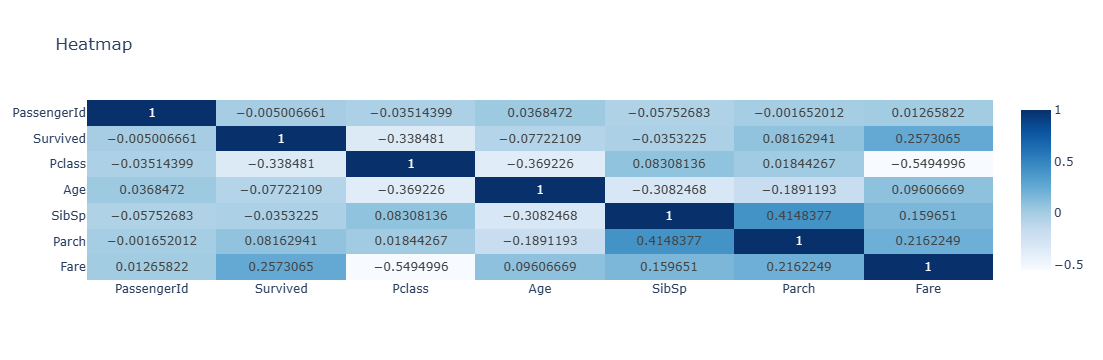

In [32]:
def feature_survived_rate(feature):
    survived = train.loc[train["Survived"] == 1, feature].value_counts()

    dead = train.loc[train["Survived"] == 0, feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]

    return df
    

In [33]:
survived_df_by_sex = feature_survived_rate("Sex")
survived_df_by_sex

Sex,female,male
Survived,233,109
Dead,81,468


### 아래의 그래프를 봤을 때, 성별은 생존률과 유의미한 상관관계가 있음
- 남성은 사망자가 더 많음
- 여성은 생존자가 더 많음

In [34]:
import plotly.express as px

fig = px.bar(
    survived_df_by_sex,
    x=survived_df_by_sex.index,
    y=["female", "male"],
    barmode="group",
    text_auto=True,
    title="Survived Count by Sex"
)

# fig.show()

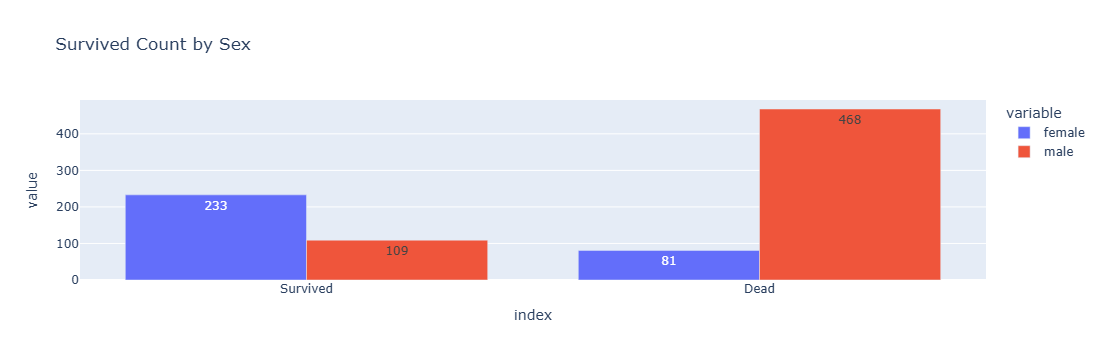